In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

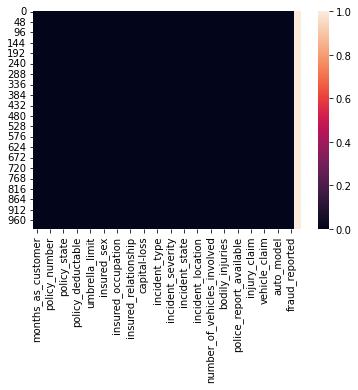

In [4]:
sns.heatmap(df.isnull())

As per the above observation there is no null value present in data frame

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

As per above observation the column fraud_reported has two unique values 

_c39 has no unique value so drop this column

In [8]:
df.drop(['_c39'],axis=1, inplace=True)

N    753
Y    247
Name: fraud_reported, dtype: int64

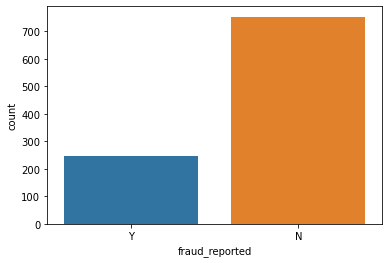

In [9]:
sns.countplot(x='fraud_reported',data=df)
df['fraud_reported'].value_counts()

As per above observation the froud reported 247 times and not reported 753 times

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

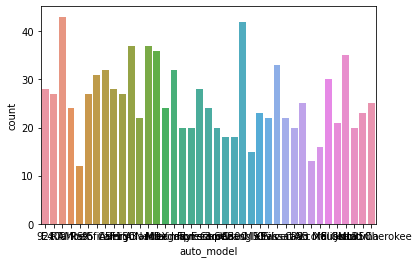

In [10]:
sns.countplot(x='auto_model',data=df)
df['auto_model'].value_counts()

Ax per above observations there are 39 unique values distribued among the data

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

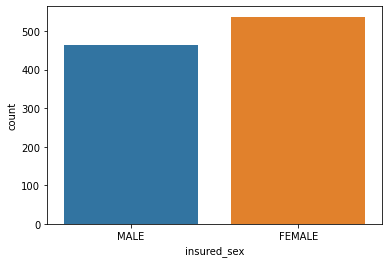

In [11]:
sns.countplot(x='insured_sex',data=df)
df['insured_sex'].value_counts()

As per above visualization there are 537 females and 463 males customers

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

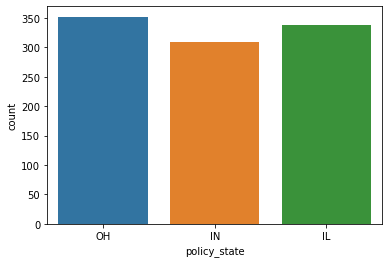

In [12]:
sns.countplot(x='policy_state',data=df)
df['policy_state'].value_counts()

As per above visualization there are 352 customers from OH, 338 from IL and 310 customers from IN state

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

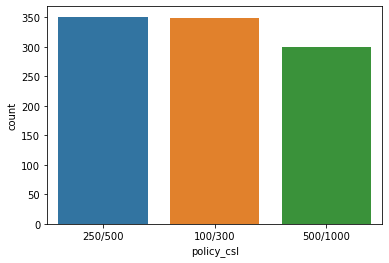

In [13]:
sns.countplot(x='policy_csl',data=df)
df['policy_csl'].value_counts()

As per above observation 351 customers has Combined Single Limit Liability Coverage  250/500, 349 has 100/300 and 300 has 500/1000

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

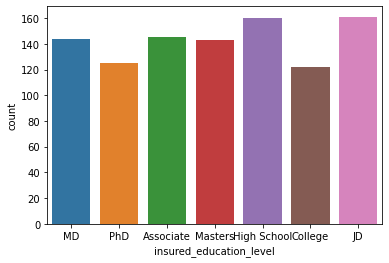

In [14]:
sns.countplot(x='insured_education_level',data=df)
df['insured_education_level'].value_counts()

As per observation 122 students are from college degree 125 form PHD, 143 from Masters, 144 from MD, 145 from Associate, 150 from High School and 161 from JD degree

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

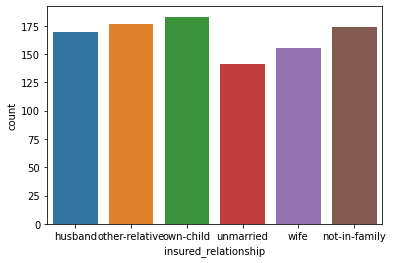

In [15]:
sns.countplot(x='insured_relationship',data=df)
df['insured_relationship'].value_counts()

As per above observation 141 customers are unmarried, 155 are wives, 170 are husbands, 174 are not-in-family, 177 are other-relatives and 183 are own-childs.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

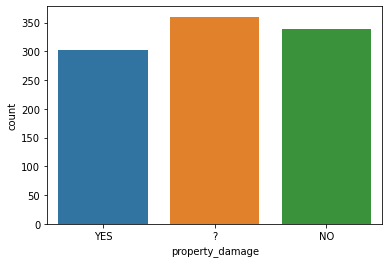

In [16]:
sns.countplot(x='property_damage',data=df)
df['property_damage'].value_counts()

As per above observation 302 has damaged property  and 338 customer has no property damage and 360 have no clue about damaged or not

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

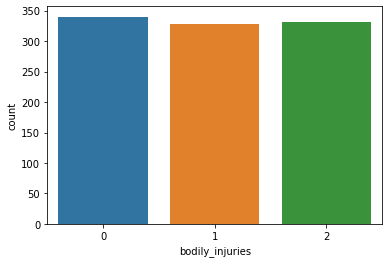

In [17]:
sns.countplot(x='bodily_injuries',data=df)
df['bodily_injuries'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

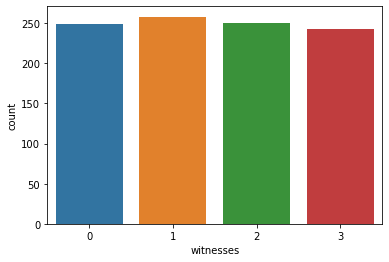

In [18]:
sns.countplot(x='witnesses',data=df)
df['witnesses'].value_counts()

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

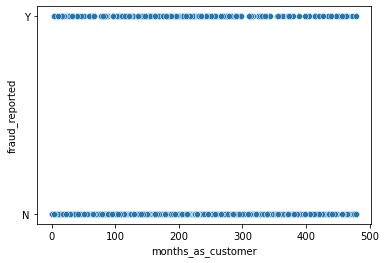

In [19]:
sns.scatterplot(data=df,x='months_as_customer',y='fraud_reported')

As per above observation fraud are equally distributed with customer per months

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

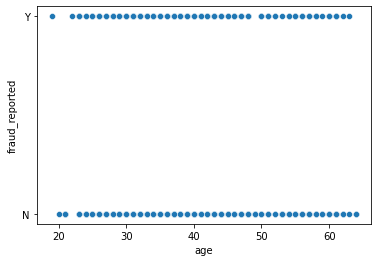

In [20]:
sns.scatterplot(data=df,x='age',y='fraud_reported')

As per above observation fraud are equally distributed with customer age

<AxesSubplot:xlabel='policy_number', ylabel='fraud_reported'>

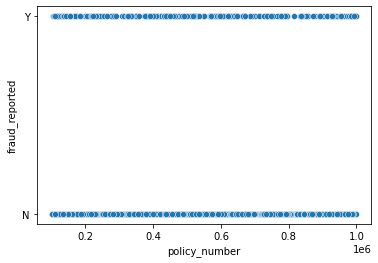

In [21]:
sns.scatterplot(data=df,x='policy_number',y='fraud_reported')

As per above observation fraud are equally distributed with customer policy number

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

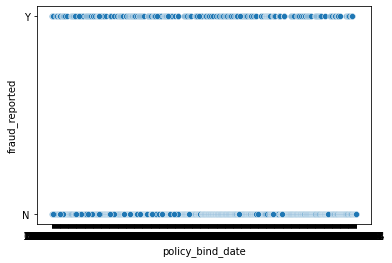

In [22]:
sns.scatterplot(data=df,x='policy_bind_date',y='fraud_reported')

As per above observation fraud are equally distributed with customer policy bind date

<AxesSubplot:xlabel='policy_state', ylabel='fraud_reported'>

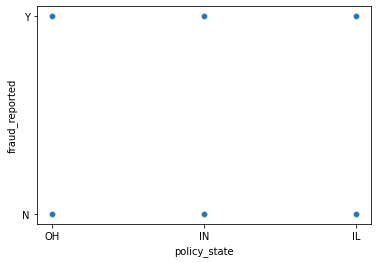

In [23]:
sns.scatterplot(data=df,x='policy_state',y='fraud_reported')

As per above observation fraud are equally distributed with customer policy state

<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

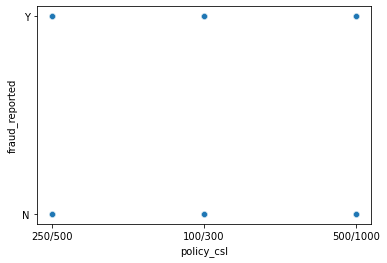

In [24]:
sns.scatterplot(data=df,x='policy_csl',y='fraud_reported')

As per above observation fraud are equally distributed with customer policy lcs

<AxesSubplot:xlabel='policy_deductable', ylabel='fraud_reported'>

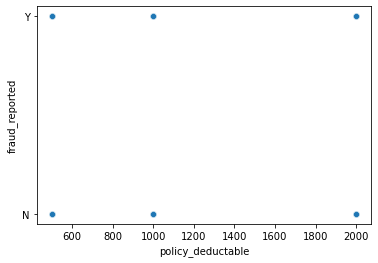

In [25]:
sns.scatterplot(data=df,x='policy_deductable',y='fraud_reported')

As per above observation fraud are equally distributed with customer per months

<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

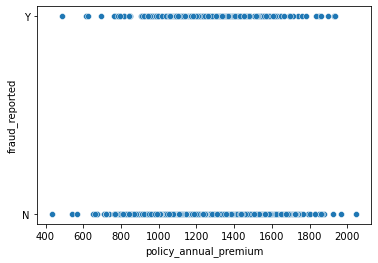

In [26]:
sns.scatterplot(data=df,x='policy_annual_premium',y='fraud_reported')

As per above observation fraud are equally distributed with customer polict annual premium

<AxesSubplot:xlabel='umbrella_limit', ylabel='fraud_reported'>

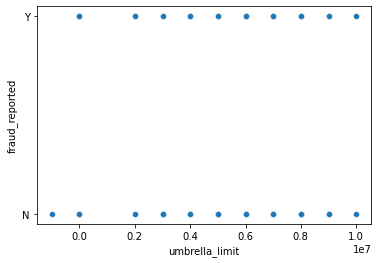

In [27]:
sns.scatterplot(data=df,x='umbrella_limit',y='fraud_reported')

As per above observation fraud are equally distributed with umbrella limit

<AxesSubplot:xlabel='insured_zip', ylabel='fraud_reported'>

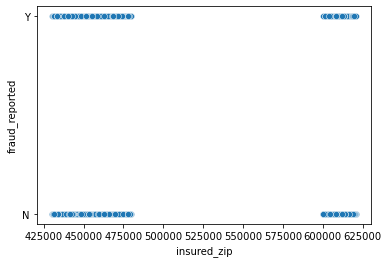

In [28]:
sns.scatterplot(data=df,x='insured_zip',y='fraud_reported')

As per above observation fraud are equally distributed with insured zip

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

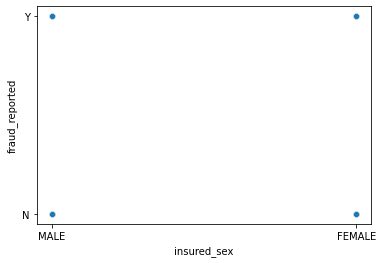

In [29]:
sns.scatterplot(data=df,x='insured_sex',y='fraud_reported')

As per above observation fraud are equally distributed with male and female

<AxesSubplot:xlabel='insured_education_level', ylabel='fraud_reported'>

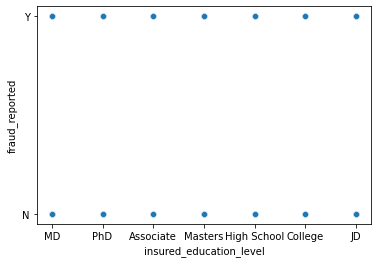

In [30]:
sns.scatterplot(data=df,x='insured_education_level',y='fraud_reported')

As per above observation fraud are equally distributed with education level

<AxesSubplot:xlabel='insured_occupation', ylabel='fraud_reported'>

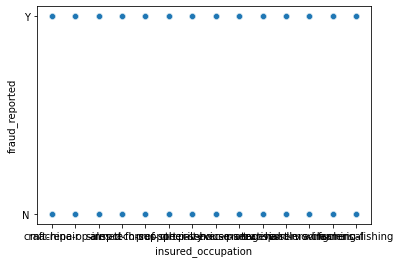

In [31]:
sns.scatterplot(data=df,x='insured_occupation',y='fraud_reported')

As per above observation fraud are equally distributed with insured occupation

<AxesSubplot:xlabel='insured_hobbies', ylabel='fraud_reported'>

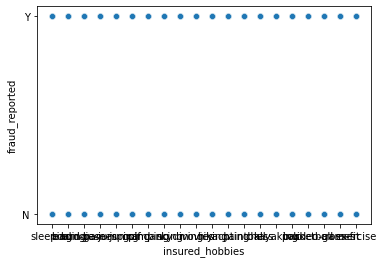

In [32]:
sns.scatterplot(data=df,x='insured_hobbies',y='fraud_reported')

As per above observation fraud are equally distributed with insured hobbies

<AxesSubplot:xlabel='insured_relationship', ylabel='fraud_reported'>

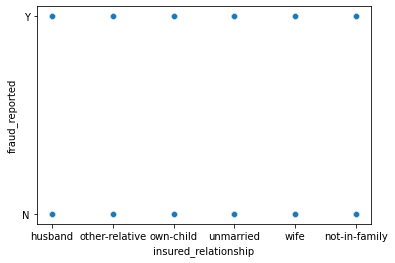

In [33]:
sns.scatterplot(data=df,x='insured_relationship',y='fraud_reported')

As per above observation fraud are equally distributed with insured relationship

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

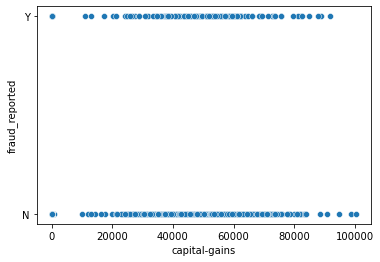

In [34]:
sns.scatterplot(data=df,x='capital-gains',y='fraud_reported')

As per above observation fraud are not equally distributed there are some outliers present

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

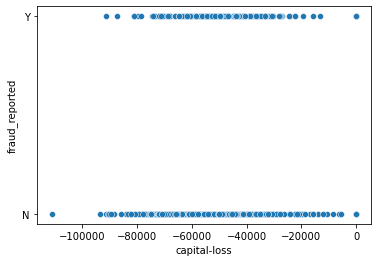

In [35]:
sns.scatterplot(data=df,x='capital-loss',y='fraud_reported')

As per above observation some outliers present

<AxesSubplot:xlabel='incident_date', ylabel='fraud_reported'>

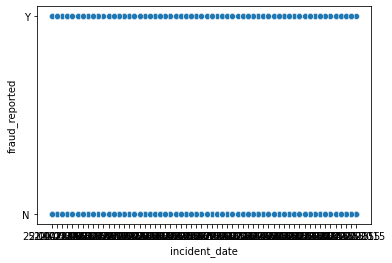

In [36]:
sns.scatterplot(data=df,x='incident_date',y='fraud_reported')

As per above observation fraud are equally distributed with incident date

<AxesSubplot:xlabel='incident_type', ylabel='fraud_reported'>

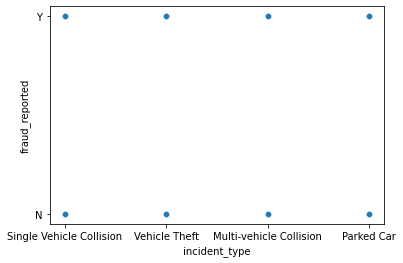

In [37]:
sns.scatterplot(data=df,x='incident_type',y='fraud_reported')

As per above observation fraud are equally distributed with incident type

<AxesSubplot:xlabel='collision_type', ylabel='fraud_reported'>

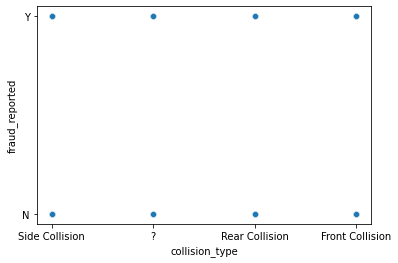

In [38]:
sns.scatterplot(data=df,x='collision_type',y='fraud_reported')

As per above observation fraud are equally distributed with collision type

<AxesSubplot:xlabel='incident_severity', ylabel='fraud_reported'>

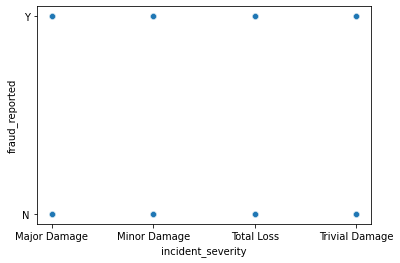

In [39]:
 sns.scatterplot(data=df,x='incident_severity',y='fraud_reported')

As per above observation fraud are equally distributed with incident severity

<AxesSubplot:xlabel='authorities_contacted', ylabel='fraud_reported'>

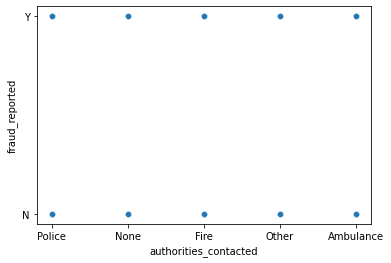

In [40]:
sns.scatterplot(data=df,x='authorities_contacted',y='fraud_reported')

As per above observation fraud are equally distributed with authorities contacted

<AxesSubplot:xlabel='incident_state', ylabel='fraud_reported'>

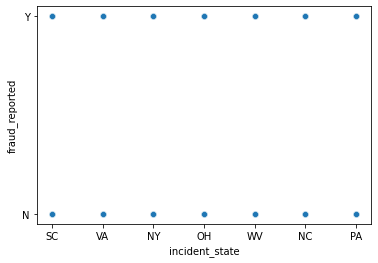

In [41]:
sns.scatterplot(data=df,x='incident_state',y='fraud_reported')

As per above observation fraud are equally distributed with incident state

<AxesSubplot:xlabel='incident_city', ylabel='fraud_reported'>

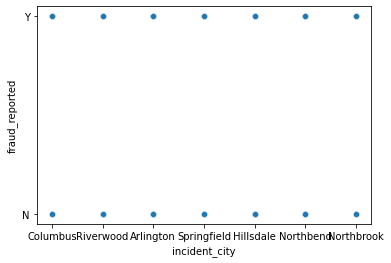

In [42]:
sns.scatterplot(data=df,x='incident_city',y='fraud_reported')

As per above observation fraud are equally distributed with incident city

<AxesSubplot:xlabel='incident_location', ylabel='fraud_reported'>

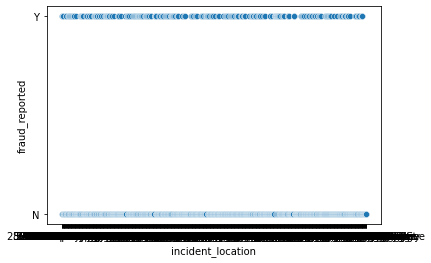

In [43]:
sns.scatterplot(data=df,x='incident_location',y='fraud_reported')

As per above observation fraud are equally distributed with incident location

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='fraud_reported'>

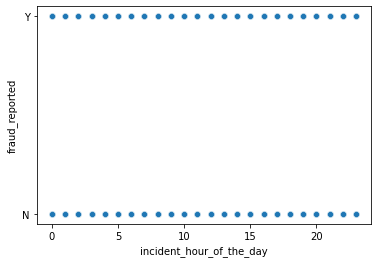

In [44]:
sns.scatterplot(data=df,x='incident_hour_of_the_day',y='fraud_reported')    

As per above observation fraud are equally distributed with incident_hour_of_the_day

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='fraud_reported'>

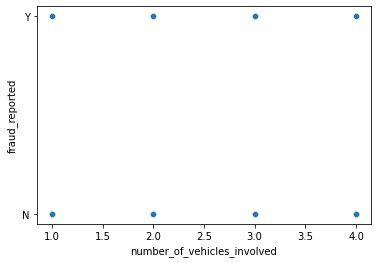

In [45]:
sns.scatterplot(data=df,x='number_of_vehicles_involved',y='fraud_reported')

As per above observation fraud are equally distributed with number of vehicles involved

<AxesSubplot:xlabel='property_damage', ylabel='fraud_reported'>

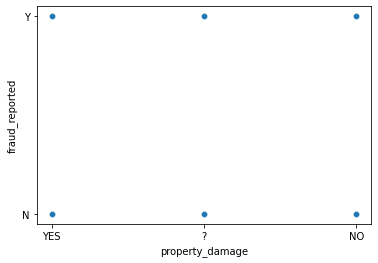

In [46]:
sns.scatterplot(data=df,x='property_damage',y='fraud_reported')

As per above observation fraud are equally distributed with number of property damaged

<AxesSubplot:xlabel='bodily_injuries', ylabel='fraud_reported'>

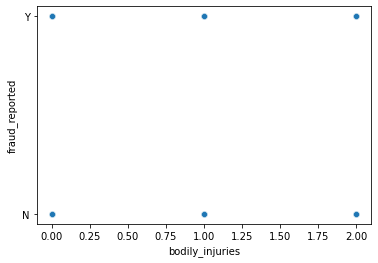

In [47]:
sns.scatterplot(data=df,x='bodily_injuries',y='fraud_reported')

As per above observation fraud are equally distributed with number of bodily injuries

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

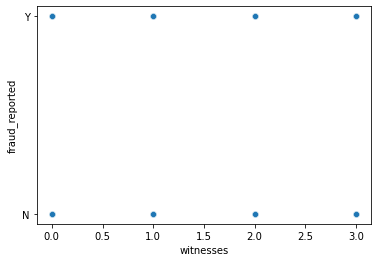

In [48]:
sns.scatterplot(data=df,x='witnesses',y='fraud_reported')

As per above observation fraud are equally distributed with witness

<AxesSubplot:xlabel='police_report_available', ylabel='fraud_reported'>

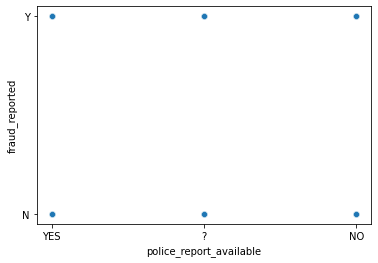

In [49]:
sns.scatterplot(data=df,x='police_report_available',y='fraud_reported')

As per above observation fraud are equally distributed with police_report_available

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

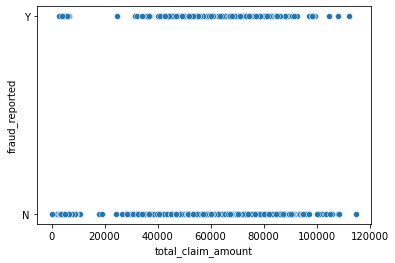

In [50]:
sns.scatterplot(data=df,x='total_claim_amount',y='fraud_reported')

As per above observation fraud are not distributed with total claim amount and some outliers are also present

<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

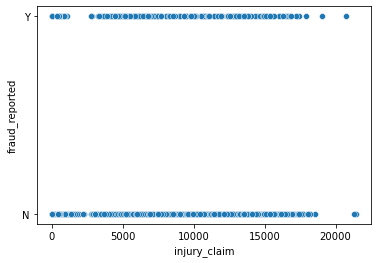

In [51]:
sns.scatterplot(data=df,x='injury_claim',y='fraud_reported')

As per above observation fraud are equally distributed with injury claim and some outliers are also present

<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

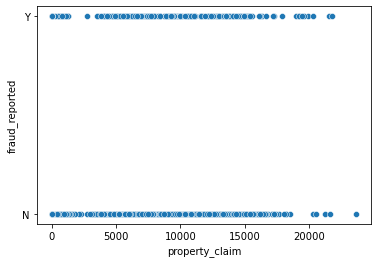

In [52]:
sns.scatterplot(data=df,x='property_claim',y='fraud_reported')

As per above observation fraud are equally distributed and some are not with property claim and some outliers are also present

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

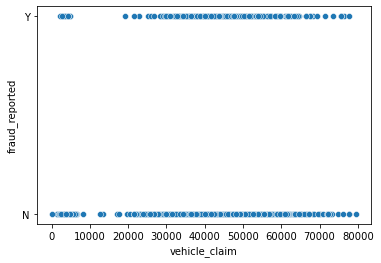

In [53]:
sns.scatterplot(data=df,x='vehicle_claim',y='fraud_reported')

As per above observation fraud are equally distributed and some are not with vehicle claim and some outliers are also present

<AxesSubplot:xlabel='auto_make', ylabel='fraud_reported'>

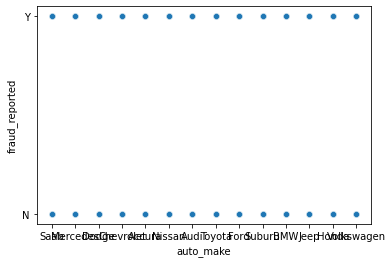

In [54]:
sns.scatterplot(data=df,x='auto_make',y='fraud_reported')

As per above observation fraud are equally distributed with auto make

<AxesSubplot:xlabel='auto_model', ylabel='fraud_reported'>

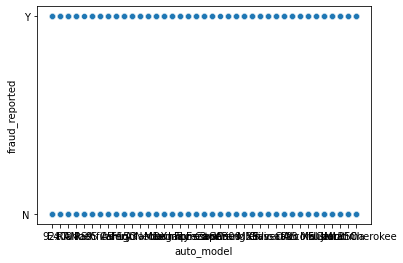

In [55]:
sns.scatterplot(data=df,x='auto_model',y='fraud_reported')

As per above observation fraud are equally distributed with auto model

<AxesSubplot:xlabel='auto_year', ylabel='fraud_reported'>

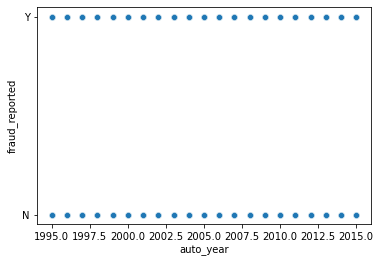

In [56]:
sns.scatterplot(data=df,x='auto_year',y='fraud_reported')

As per above observation fraud are equally distributed with auto year

# Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


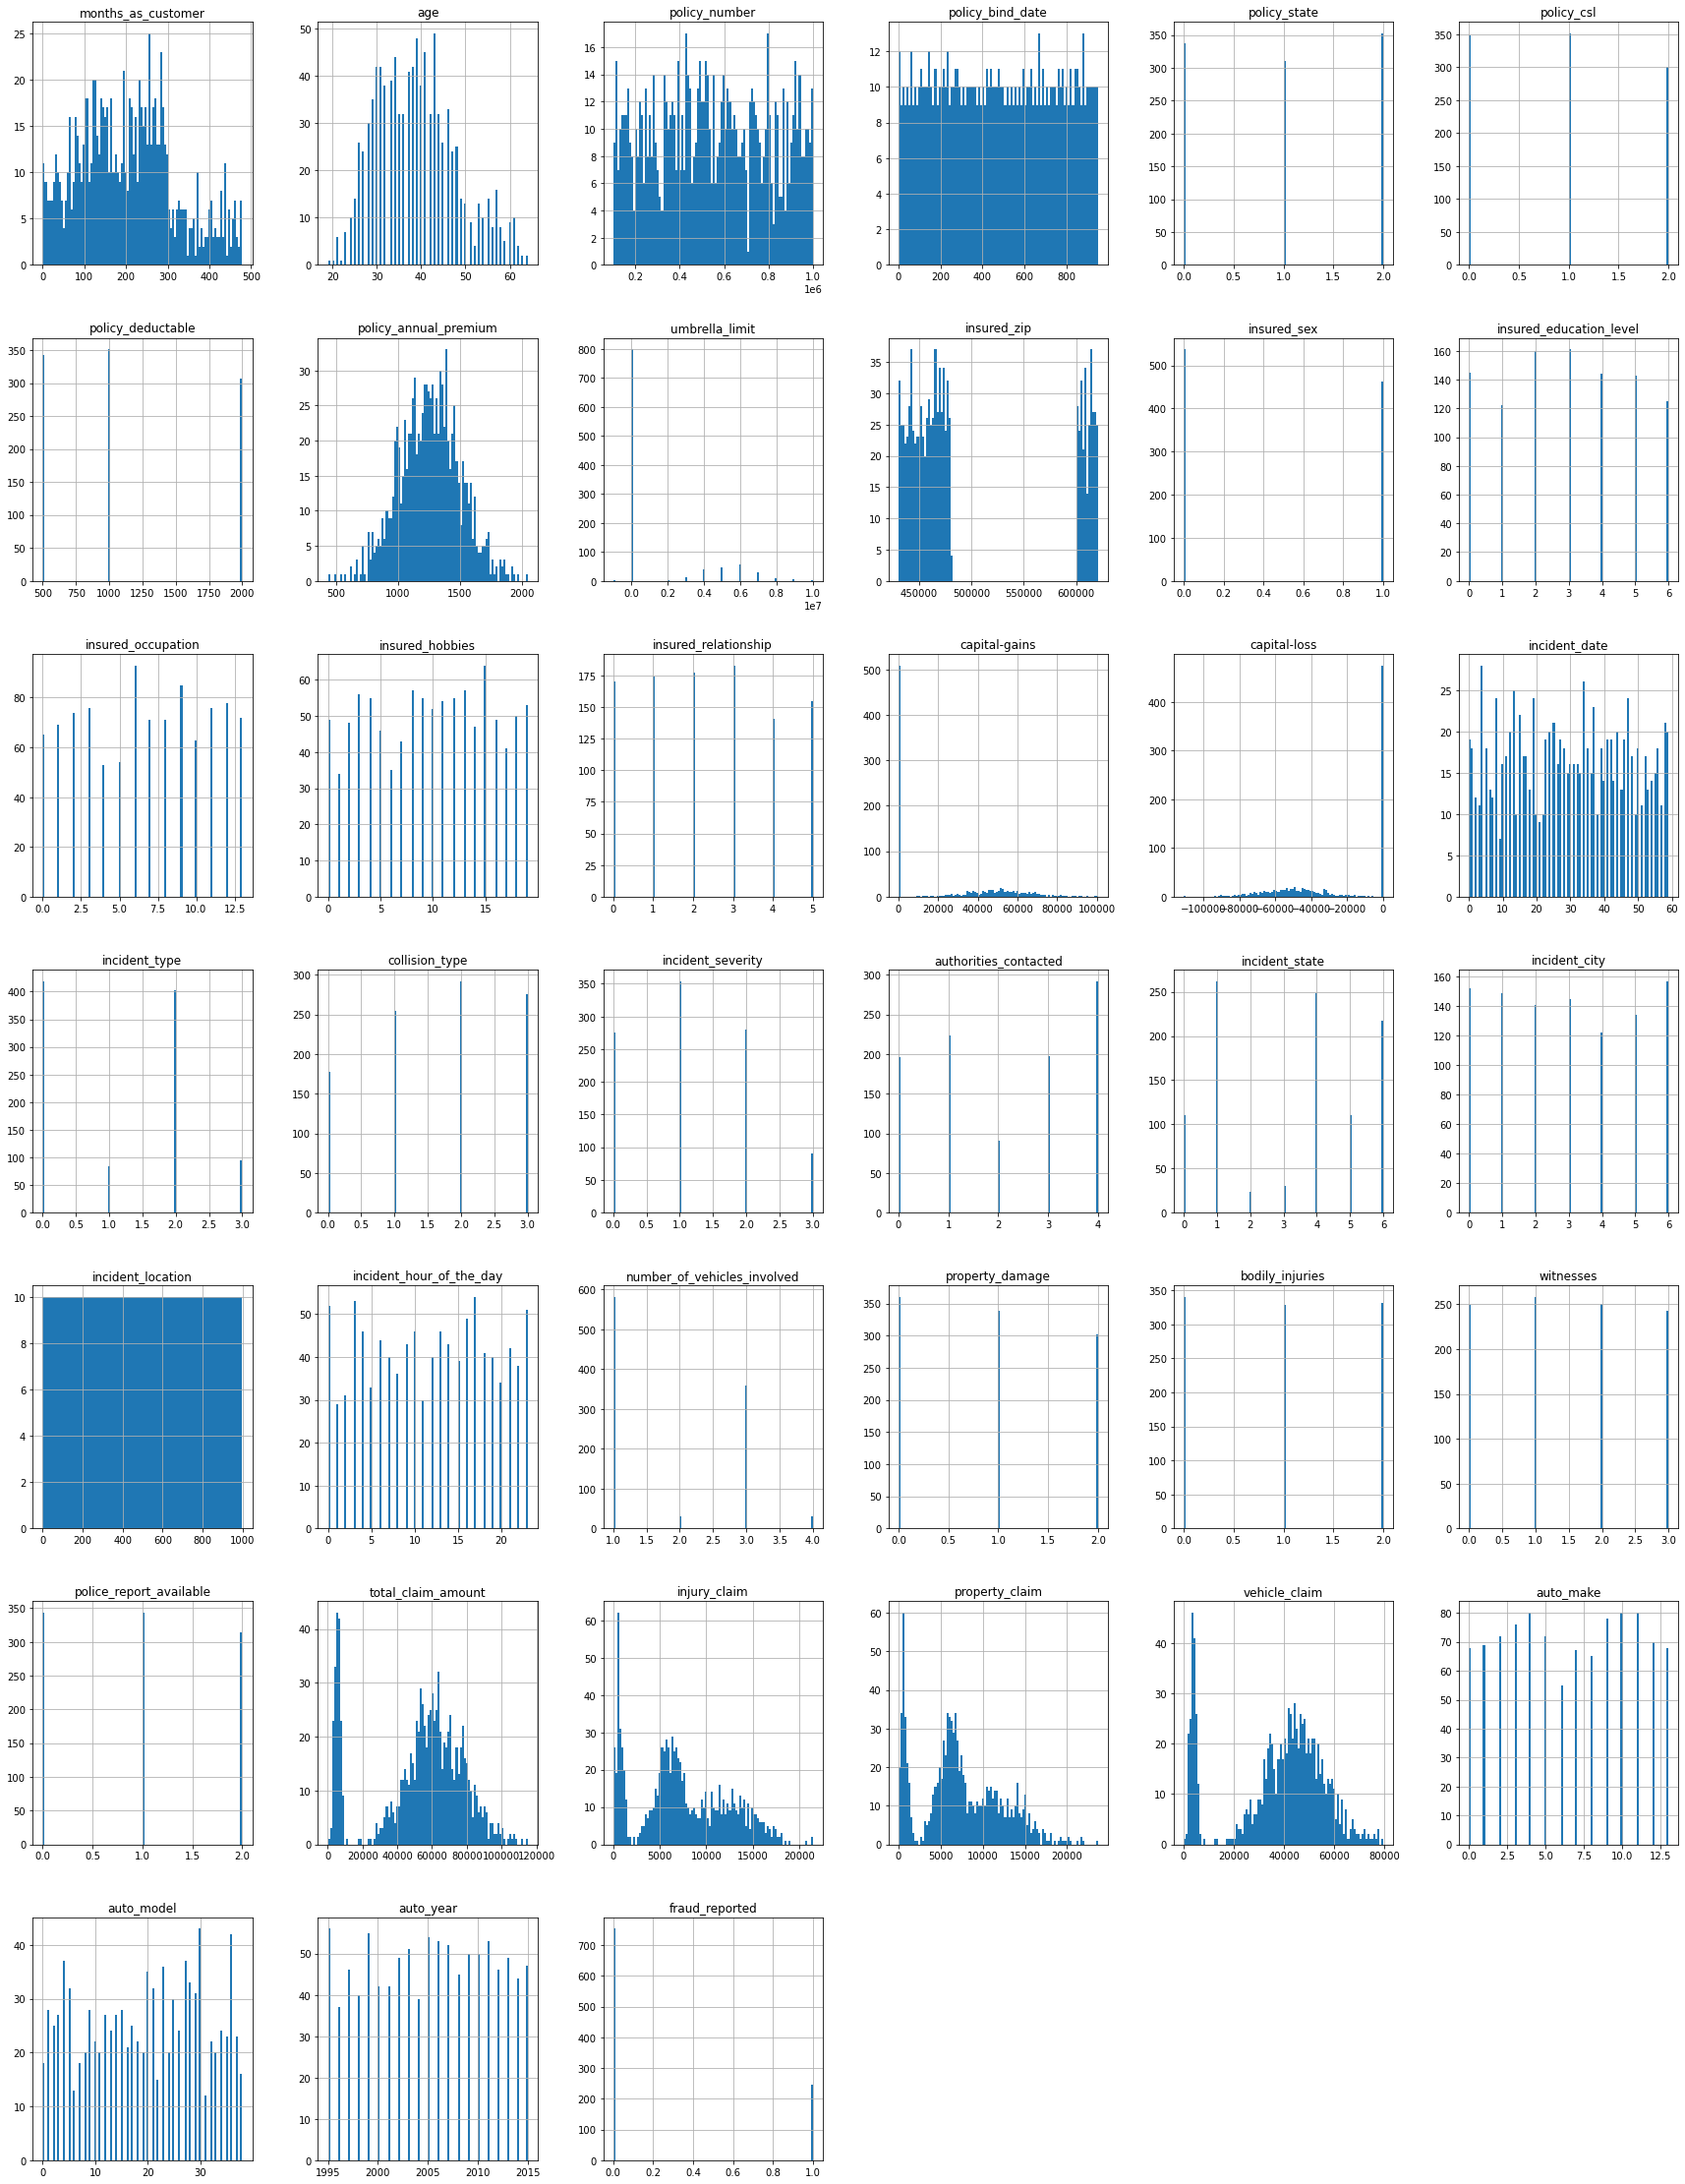

In [58]:
df.hist(figsize= (30,40), bins =100, xlabelsize = 10, ylabelsize = 10)
plt.show()

As per above visualization it is showing the distribuition of individual column

# Normal distribution Curve

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

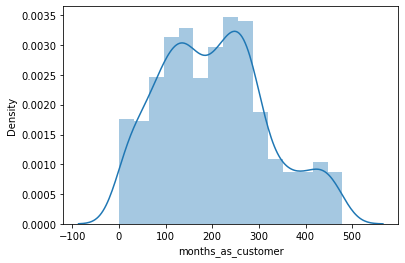

In [59]:
sns.distplot(df['months_as_customer'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

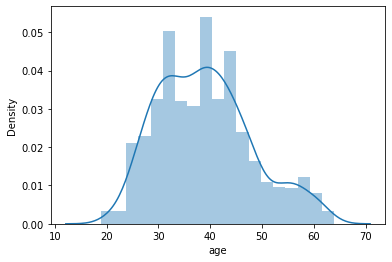

In [60]:
sns.distplot(df['age'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_number', ylabel='Density'>

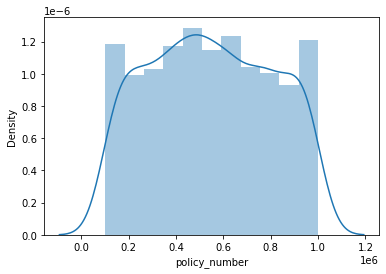

In [61]:

sns.distplot(df['policy_number'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

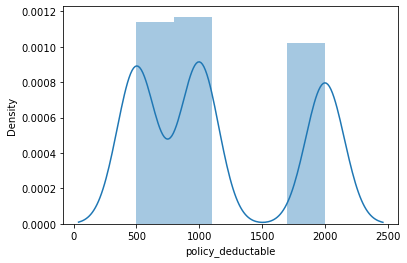

In [62]:
sns.distplot(df['policy_deductable'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

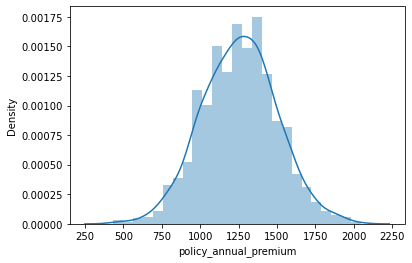

In [63]:
sns.distplot(df['policy_annual_premium'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

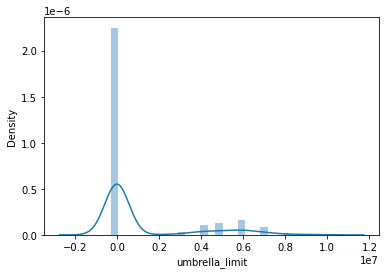

In [64]:
sns.distplot(df['umbrella_limit'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

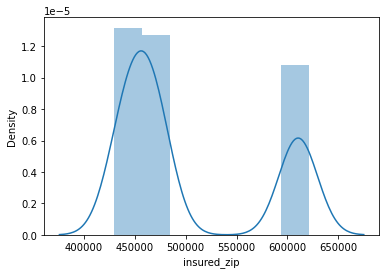

In [65]:
sns.distplot(df['insured_zip'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

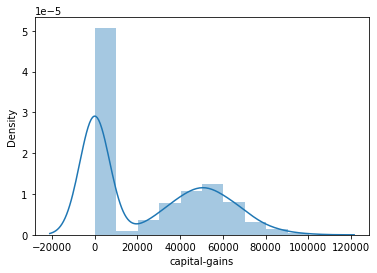

In [66]:
sns.distplot(df['capital-gains'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

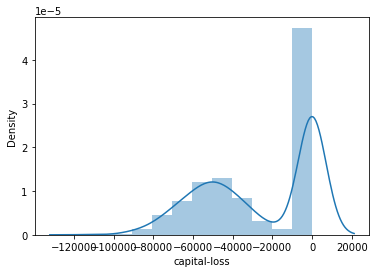

In [67]:
sns.distplot(df['capital-loss'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

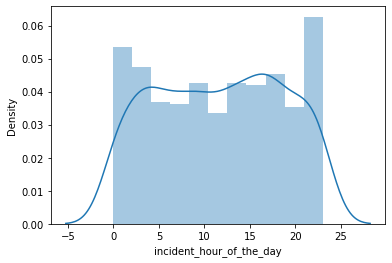

In [68]:

sns.distplot(df['incident_hour_of_the_day'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

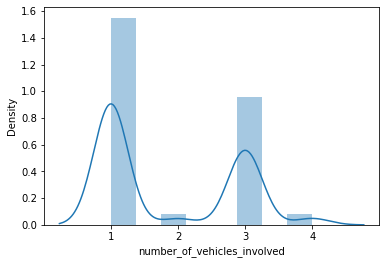

In [69]:
sns.distplot(df['number_of_vehicles_involved'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

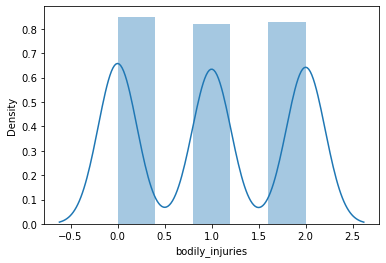

In [70]:

sns.distplot(df['bodily_injuries'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='witnesses', ylabel='Density'>

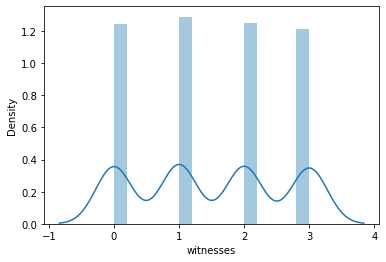

In [71]:
sns.distplot(df['witnesses'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

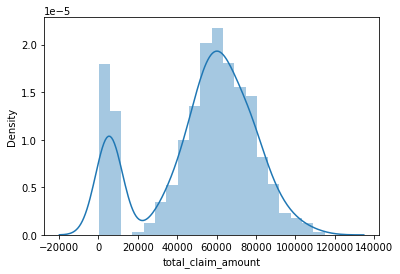

In [72]:
sns.distplot(df['total_claim_amount'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

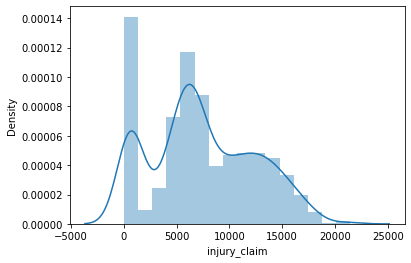

In [73]:
sns.distplot(df['injury_claim'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='property_claim', ylabel='Density'>

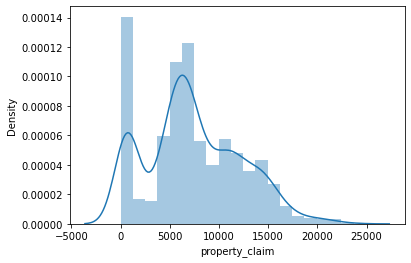

In [74]:
sns.distplot(df['property_claim'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

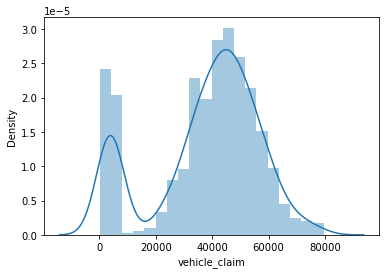

In [75]:
sns.distplot(df['vehicle_claim'])

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='auto_year', ylabel='Density'>

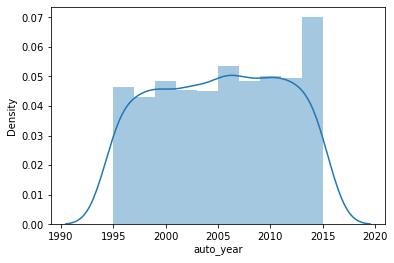

In [76]:
sns.distplot(df['auto_year'])

As per above observation skewness is present some data is large spreaded and some are right skwed and are not normally distributed. so skewness is present in data

In [77]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

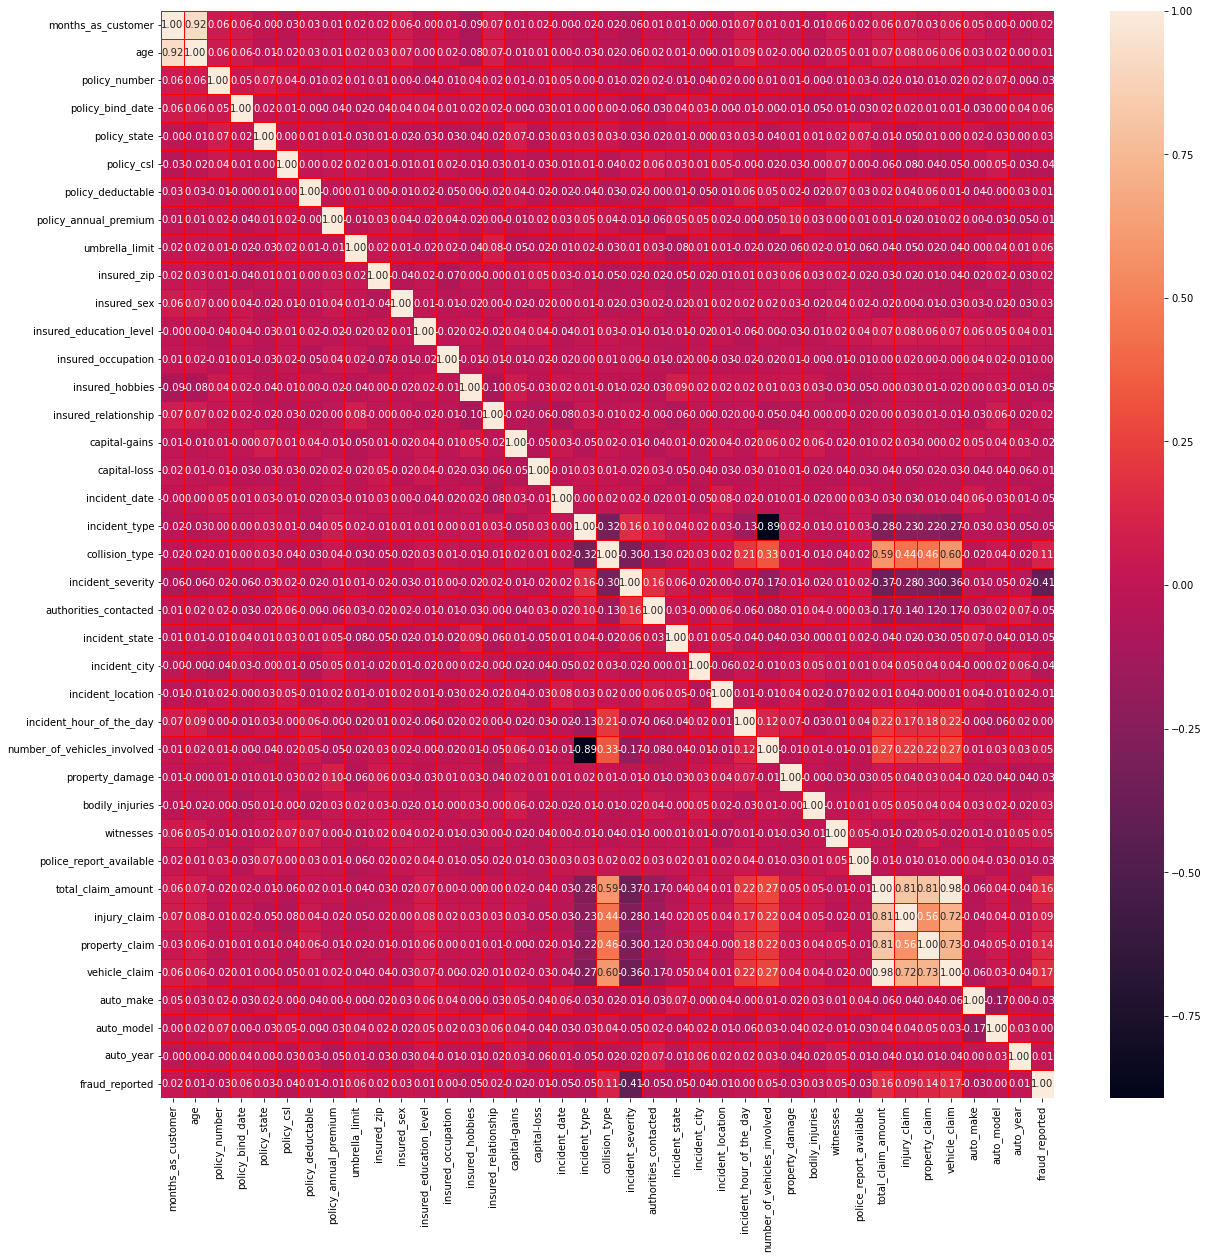

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True, linewidth=1, linecolor='red', fmt='0.2f')

As per above observation vehicle_claim is highly coorelated with target variable with fraud_reported.total_claim_amount is 2nd highest coorelated with target varible, Property_claim  and collision_type is 3rd and 4th highly coorelated with target varible 

Incedent_severity is negatively coorelated with target varible

In [79]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


Skewness mor than +/-0.5 will be treated
Removing skewness from numerical data

In [88]:
from sklearn.preprocessing import power_transform

df[["total_claim_amount","vehicle_claim","injury_claim","months_as_customer"]]=power_transform(df[["total_claim_amount","vehicle_claim","injury_claim","months_as_customer"]],method='yeo-johnson')

# Checking Outliers

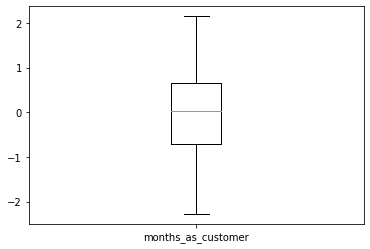

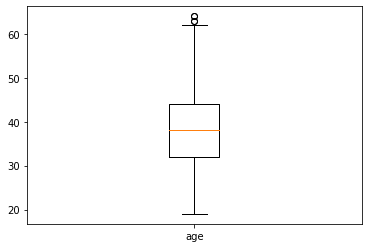

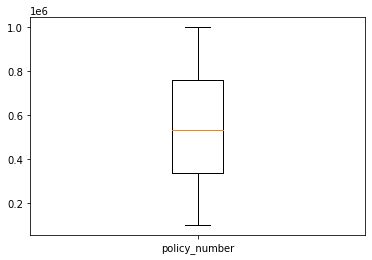

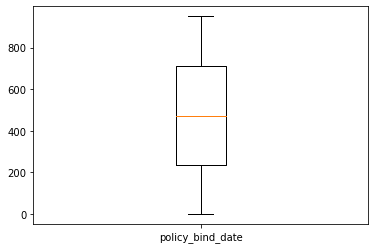

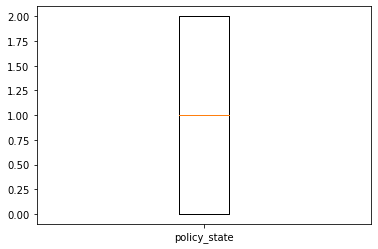

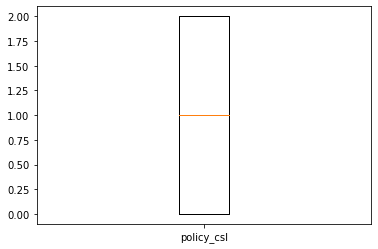

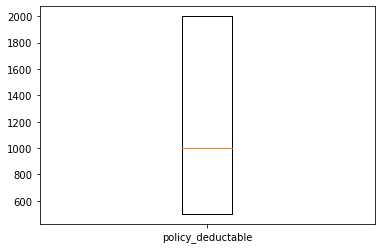

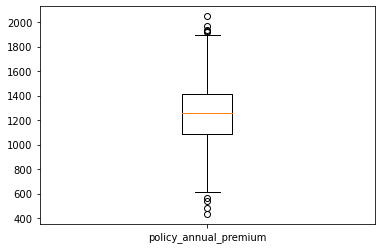

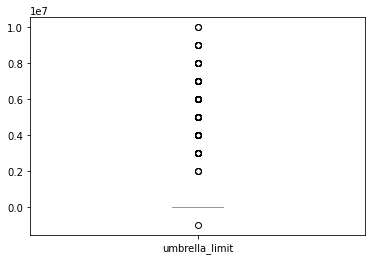

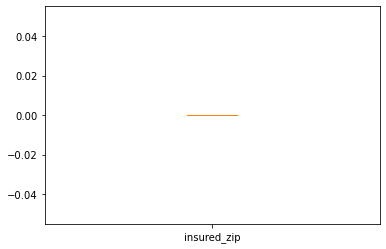

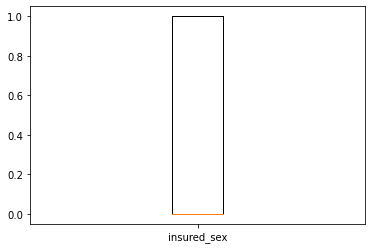

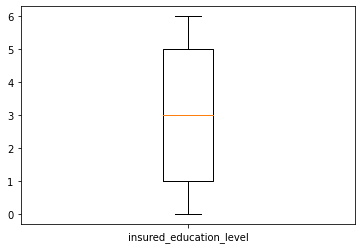

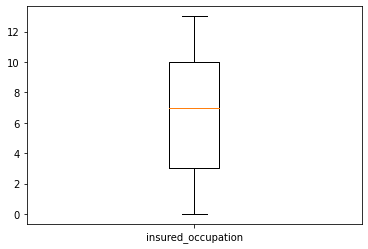

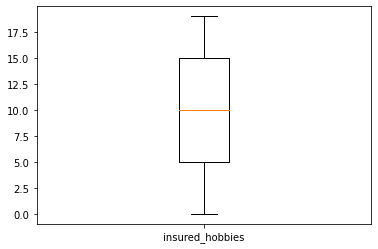

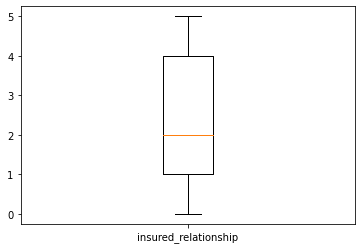

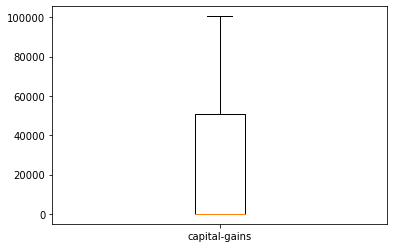

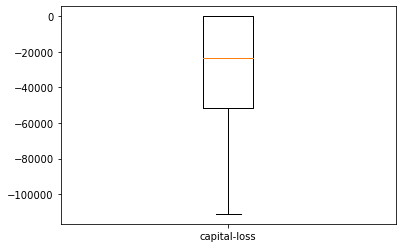

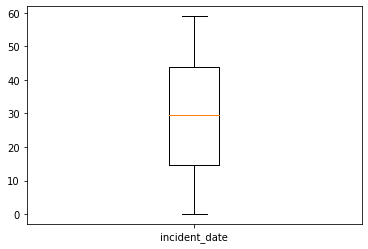

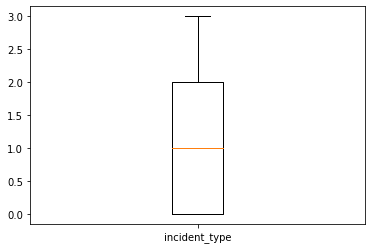

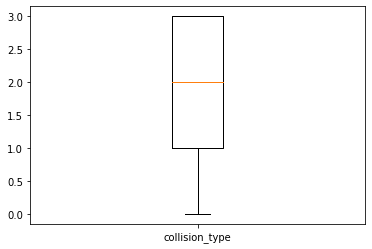

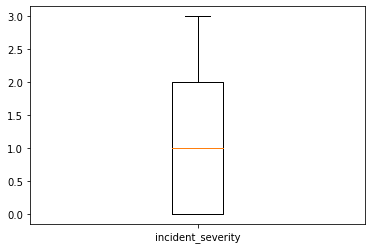

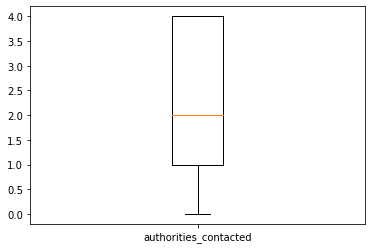

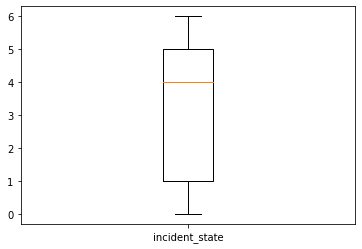

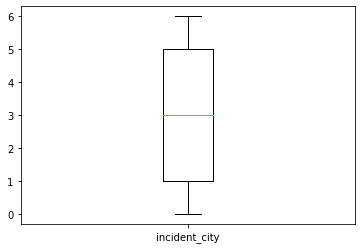

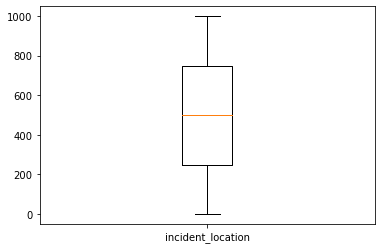

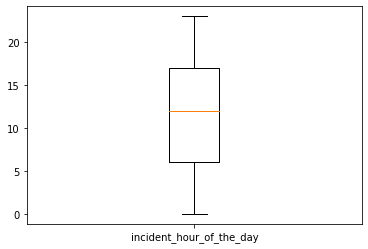

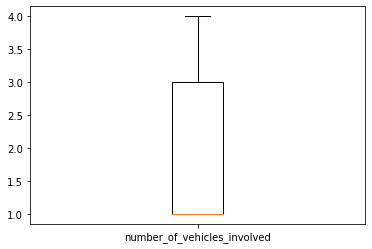

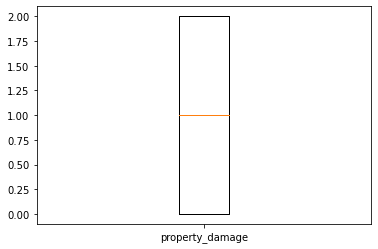

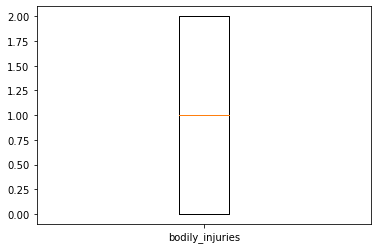

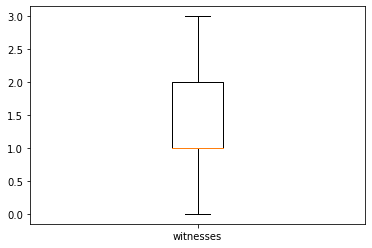

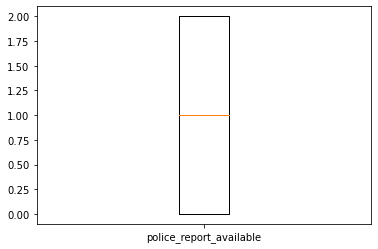

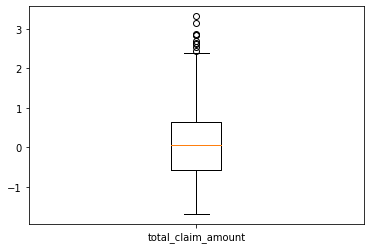

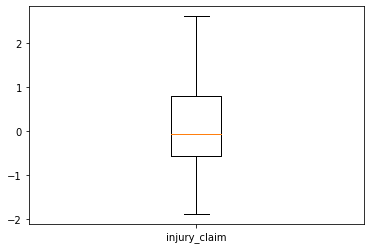

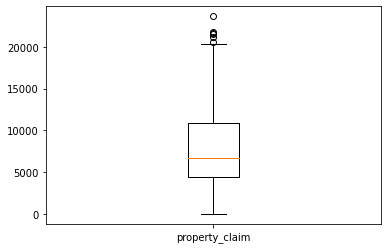

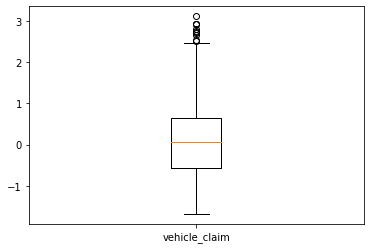

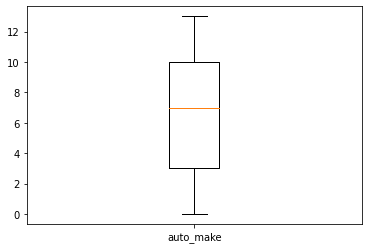

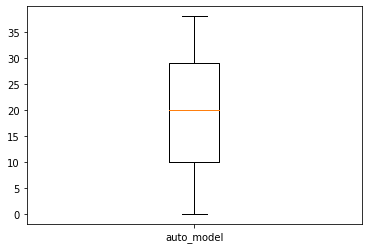

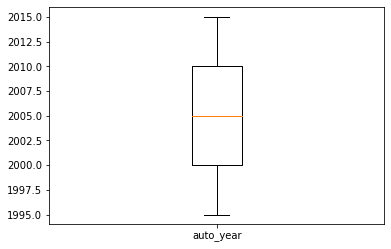

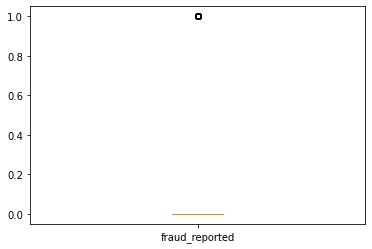

In [89]:
for i in df:
    plt.boxplot(df[i], labels= [i])
    plt.show()

# Removing Outliers

In [90]:
from scipy.stats import zscore

z=np.abs(zscore(df[['policy_annual_premium','total_claim_amount','property_claim','vehicle_claim']]))
print(np.where(z>3))

(array([ 11,  11, 149, 229, 248, 500, 763], dtype=int64), array([1, 3, 1, 0, 0, 2, 0], dtype=int64))


In [91]:
z=np.abs(zscore(df[['policy_annual_premium','total_claim_amount','property_claim','vehicle_claim']]))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (1000, 39)
After removing outliers:: (994, 39)


In [92]:
print ("Percentage of data loss: ", ((1000-994)/1000)*100)

Percentage of data loss:  0.6


# Splitting feature and target vatiables

In [94]:
x=df_new.drop('fraud_reported',axis=1)
y=df_new['fraud_reported']

In [95]:
x.shape

(994, 38)

In [96]:
y.shape

(994,)

# Scaling the data using min max scaler

In [99]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
x=mn.fit_transform(x)

# Importing Models

In [100]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= .22, random_state=42)
estimator = []
estimator.append(('LR',LogisticRegression()))
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SV',SVC()))
estimator.append(('DT',DecisionTreeClassifier()))
estimator.append(('RF',RandomForestClassifier(n_estimators=100, random_state=42)))
estimator

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('SV', SVC()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier(random_state=42))]

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [103]:
vot_hard = VotingClassifier(estimators= estimator, voting= 'hard')
vot_hard.fit(xtrain,ytrain)
pred = vot_hard.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.7625570776255708
Confusion Metrics [[156  14]
 [ 38  11]]
Classification_report               precision    recall  f1-score   support

           0       0.80      0.92      0.86       170
           1       0.44      0.22      0.30        49

    accuracy                           0.76       219
   macro avg       0.62      0.57      0.58       219
weighted avg       0.72      0.76      0.73       219



In [104]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
mod = [LR, KNN, SV, DT, RF]

mod

[LogisticRegression(),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(random_state=42)]

In [105]:
for i in mod:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= .22, random_state=42)
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    print("Accuracy Score", accuracy_score(ytest,pred))
    print("Confusion Metrics", confusion_matrix(ytest,pred))
    print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.7534246575342466
Confusion Metrics [[149  21]
 [ 33  16]]
Classification_report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       170
           1       0.43      0.33      0.37        49

    accuracy                           0.75       219
   macro avg       0.63      0.60      0.61       219
weighted avg       0.73      0.75      0.74       219

Accuracy Score 0.726027397260274
Confusion Metrics [[152  18]
 [ 42   7]]
Classification_report               precision    recall  f1-score   support

           0       0.78      0.89      0.84       170
           1       0.28      0.14      0.19        49

    accuracy                           0.73       219
   macro avg       0.53      0.52      0.51       219
weighted avg       0.67      0.73      0.69       219

Accuracy Score 0.7671232876712328
Confusion Metrics [[164   6]
 [ 45   4]]
Classification_report               precision    recall  f1-score   support

 

As per above result we consider Decision Tree gives the best accuracy

# Now we can check with various parameter using Grid Search CV

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
model = DecisionTreeClassifier()

In [111]:
param_grid = {'criterion' :['entropy','gini'], 'random_state' : [0,20,40,42]}

In [112]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [113]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'random_state': [0, 20, 40, 42]})

In [114]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7987096774193548
DecisionTreeClassifier(criterion='entropy', random_state=40)
{'criterion': 'entropy', 'random_state': 40}


As per Grid Search CV we found the best accuracy when criterion='entropy', random_state= 40

In [115]:
DTC = DecisionTreeClassifier(criterion='entropy', random_state= 40)

In [116]:
DTC.fit(xtrain,ytrain)
pred = DTC.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.776255707762557
Confusion Metrics [[139  31]
 [ 18  31]]
Classification_report               precision    recall  f1-score   support

           0       0.89      0.82      0.85       170
           1       0.50      0.63      0.56        49

    accuracy                           0.78       219
   macro avg       0.69      0.73      0.70       219
weighted avg       0.80      0.78      0.78       219



# Cross validation score for Random Forest Classifier

In [118]:
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    score= cross_val_score(DTC,x,y,cv=i)
    print("At cv value at", i,"the cv score is",score)
    print(score.mean())
    print(score.std())

At cv value at 2 the cv score is [0.78672032 0.73239437]
0.7595573440643864
0.02716297786720323
At cv value at 3 the cv score is [0.80722892 0.75528701 0.78549849]
0.7826714713840256
0.02129920872626231
At cv value at 4 the cv score is [0.78313253 0.77911647 0.82258065 0.73387097]
0.7796751522217904
0.03142916731567754
At cv value at 5 the cv score is [0.78894472 0.77889447 0.74874372 0.79396985 0.78282828]
0.7786762093294757
0.015827691950382083
At cv value at 6 the cv score is [0.78313253 0.75903614 0.75301205 0.73493976 0.76363636 0.78787879]
0.7636059389071438
0.01791332509776621
At cv value at 7 the cv score is [0.78873239 0.78169014 0.71126761 0.80985915 0.75352113 0.81690141
 0.76056338]
0.7746478873239437
0.03366841153054629
At cv value at 8 the cv score is [0.76       0.776      0.79032258 0.76612903 0.77419355 0.83064516
 0.82258065 0.74193548]
0.7827258064516129
0.028539852013730934
At cv value at 9 the cv score is [0.81081081 0.75675676 0.79279279 0.76576577 0.77272727 0.75

# AUC ROC CURVE

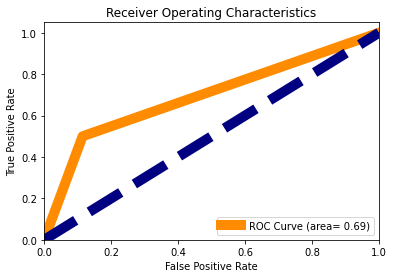

In [119]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred, ytest)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color = "darkorange", lw =10, label ="ROC Curve (area= %0.2f)" %roc_auc)
plt.plot([0,1], [0,1], color= 'navy', lw =10, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc ="lower right")
plt.show()

# Model Saving

In [120]:
import pickle
filename = "Insurance.pkl"
pickle.dump(DTC, open(filename, 'wb'))

# Conclusion

In [121]:
import numpy as np
a = np.array(ytest)
predicted =np.array(DTC.predict(xtrain))
df_com= pd.DataFrame({"Original":a, "Predicted":pred}, index =range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
214,1,0
215,0,0
216,0,0
217,0,1
